In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf, adfuller

In [4]:
!ls -altr

total 456
-rw-rw-rw-@ 1 venkrame  staff   20965 Oct 11 16:19 bw.2.log
-rw-rw-rw-@ 1 venkrame  staff   28315 Oct 11 16:20 lat.2.log
drwxr-xr-x@ 3 venkrame  staff      96 Oct 11 23:52 .ipynb_checkpoints
-rw-r--r--@ 1 venkrame  staff  170803 Oct 27 07:03 timeseries_analysis.ipynb
drwxr-xr-x  4 venkrame  staff     128 Nov  1 22:20 ..
drwxr-xr-x@ 7 venkrame  staff     224 Nov  1 22:21 .
-rw-r--r--@ 1 venkrame  staff    6148 Nov  1 22:21 .DS_Store


In [5]:
df_lat = pd.read_csv('lat.2.log')
df_lat.head()

,time(msec),lat(ns),read0_write1,offset
0,250,53483,1,0
1,750,57462,1,0
2,1000,55109,1,0
3,1125,127433,0,0
4,1125,38527,1,0


In [6]:
df_bw = pd.read_csv('bw.2.log')
df_bw.head()

,time(msec),BW(kbps),read0_write1,offset
0,250,144,0,0
1,250,32,1,0
2,500,64,1,0
3,750,32,1,0
4,1000,16,1,0


In [7]:
 BASE_MSEC = 1570862153306

In [8]:
BASE_TIME = datetime.datetime(1970, 1, 1)

In [9]:
df_lat.columns = ['time' ,'lat', 'dir', 'offset']

In [10]:
df_bw.columns = ['time' ,'bw', 'dir', 'offset']

In [11]:
# df_lat['time(msec)'] = df_lat['time(msec)'] + BASE_MSEC

In [12]:
df_lat['time'] = df_lat['time'].apply(lambda x: datetime.timedelta(0, 0, 0, 1570862153306 + x) + BASE_TIME)

In [13]:
df_bw['time'] = df_bw['time'].apply(lambda x: datetime.timedelta(0, 0, 0, 1570862153306 + x) + BASE_TIME)

In [14]:
df_lat = df_lat.set_index('time')

In [15]:
df_lat = df_lat.query('dir == 1')[['lat']]

In [16]:
df_bw = df_bw.set_index('time')

In [17]:
df_bw = df_bw.query('dir == 1')[['bw']]

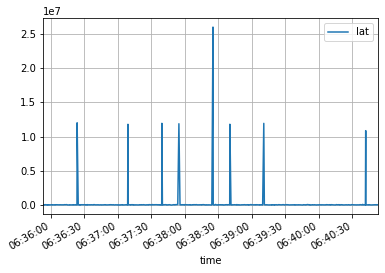

In [18]:
df_lat.plot(grid=True)

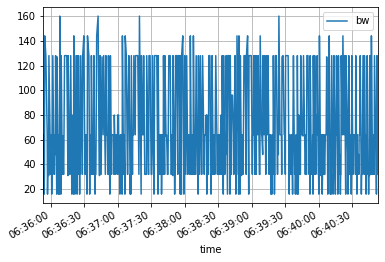

In [19]:
df_bw.plot(grid=True)

In [20]:
df = df_lat.join(df_bw, how='inner')

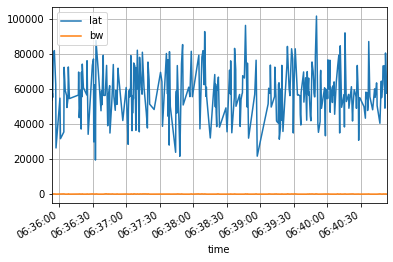

In [21]:
df.plot(grid=True)

In [22]:
df.loc['2019-10-12 06:36'].head() # Filter by datetiem

,lat,bw
time,,
2019-10-12 06:36:00.806,54705,48
2019-10-12 06:36:01.056,42798,16
2019-10-12 06:36:01.306,31598,32
2019-10-12 06:36:04.306,35417,48
2019-10-12 06:36:04.556,72275,128


In [23]:
df.head()

,lat,bw
time,,
2019-10-12 06:35:53.556,53483,32
2019-10-12 06:35:54.056,57462,32
2019-10-12 06:35:54.306,55109,16
2019-10-12 06:35:54.806,77867,144
2019-10-12 06:35:55.806,81790,128


In [24]:
df.pct_change().head() # U lose original values if u invoke on dataframe

,lat,bw
time,,
2019-10-12 06:35:53.556,NaN,NaN
2019-10-12 06:35:54.056,0.074397,0.000000
2019-10-12 06:35:54.306,-0.040949,-0.500000
2019-10-12 06:35:54.806,0.412963,8.000000
2019-10-12 06:35:55.806,0.050381,-0.111111


In [25]:
df['bw_pct_change'] = df['bw'].pct_change()

In [26]:
df['lat_pct_change'] = df['lat'].pct_change()

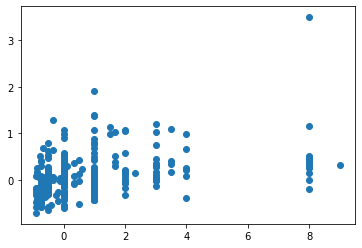

In [27]:
plt.scatter(df['bw_pct_change'], df['lat_pct_change'])
plt.show();

In [28]:
corr = df['bw_pct_change'].corr(df['lat_pct_change'])

In [29]:
print(corr)

0.39456433879425384


In [30]:
df.head()

,lat,bw,bw_pct_change,lat_pct_change
time,,,,
2019-10-12 06:35:53.556,53483,32,NaN,NaN
2019-10-12 06:35:54.056,57462,32,0.000000,0.074397
2019-10-12 06:35:54.306,55109,16,-0.500000,-0.040949
2019-10-12 06:35:54.806,77867,144,8.000000,0.412963
2019-10-12 06:35:55.806,81790,128,-0.111111,0.050381


In [31]:
df['lat_pct_change'].autocorr()

-0.39084454712611294

In [32]:
df = df.dropna()

In [33]:
df_every_30s = df.resample(rule='30s').last()

In [34]:
df_every_30s['lat'].autocorr()

-0.17348296215894707

In [35]:
# 95% confidence interval is 
N = df.shape[0]

In [36]:
from math import sqrt
sqrt(2/ sqrt(N)) # yay statistically significant

0.33384973044031435

In [37]:
N_every_30s = df_every_30s.shape[0]

In [38]:
sqrt(2/ sqrt(N_every_30s)) # Not statistically significant cos small sample size

0.7765453555044466

In [39]:
acf(df['lat_pct_change'])

/Users/venkrame/miniconda3/envs/ipykernel_py3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        , -0.39044333, -0.05916174, -0.04181536,  0.08848419,
        0.02792673, -0.09068145,  0.12181322, -0.06424649,  0.01081958,
       -0.04218191,  0.04893388,  0.01633206, -0.08478955,  0.10057578,
       -0.00764911, -0.02422674, -0.07982175,  0.11347909, -0.07522547,
        0.03137853, -0.02203107,  0.02300511,  0.08847343, -0.0982526 ,
       -0.03031511,  0.01381635,  0.04049518,  0.05462382, -0.05450942,
       -0.01744095,  0.01199503,  0.00612754, -0.02733201,  0.03956831,
        0.0119078 , -0.05763299, -0.03243325,  0.0701207 , -0.02080433,
        0.01928297])

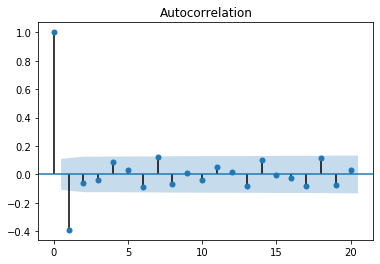

In [40]:
plot_acf(df['lat_pct_change'], lags=20, alpha=0.05);

Seasonality can also be seen - peaking of acf occurs 3-4. IF this were more regular, we could've removed it using .diff(period). Non-stationary if autocorrelation peaks at certain periodic lags.

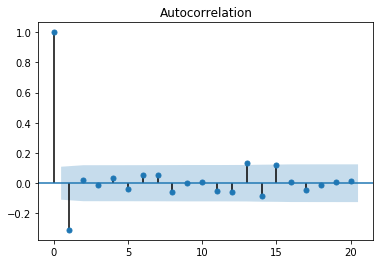

In [41]:
plot_acf(df['bw_pct_change'], lags=20, alpha=0.05);

In [42]:
adfuller(df['lat_pct_change'])

(-16.117116940846742,
 4.942307963503755e-29,
 2,
 319,
 {'1%': -3.4510167751522642,
  '5%': -2.87064334231426,
  '10%': -2.5716201744283174},
 301.2037813447615)

Since p value of 4.94-29 is significantly lowre than 0.05, we can reject null hypothesis. So not a random walk